In [3]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant

from sklearn.svm import SVC 

# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# grhpviz
from sklearn.tree import export_graphviz
import graphviz

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier


# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 그레디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [55]:
#영화 데이터 불러오기
raw_movie_data=pd.read_csv("./Data_OTT_update//download_inventory_final.csv")
raw_movie_data.head()

,customer_id,item_id,movie_id,down_year,down_month,down_weekday,season,title,release_year,contract_year,...,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,price
0,C5001,I-1038,tt1951264,2015,Jan,Thu,winter,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
1,C5011,I-1038,tt1951264,2015,Mar,Fri,spring,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
2,C5024,I-1038,tt1951264,2015,Aug,Wed,summer,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
3,C5027,I-1038,tt1951264,2015,May,Mon,spring,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0
4,C5035,I-1038,tt1951264,2015,Aug,Wed,summer,The Hunger Games: Catching Fire,2013,2015,...,Action,Adventure,Mystery,Jennifer Lawrence,Liam Hemsworth,Jack Quaid,2600,6,10,1000.0


In [56]:
df_cus = pd.read_csv("Data_OTT_update//movie_custom_final.csv", encoding = 'utf-8')
df_cus

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...
3272,C8273,F,43,40대,M,N,마포구,2018,8,37000.0,Bronze
3273,C8274,F,24,20대,M,N,송파구,2018,10,48700.0,Bronze
3274,C8275,F,55,50대,S,N,강남구,2018,9,44500.0,Bronze
3275,C8276,F,36,30대,S,Y,서대문구,2018,17,77500.0,Bronze


### - 다운로드 횟수와 imdb 평점과의 관계

In [57]:
down_count_ = pd.DataFrame()
down_count_["down_count"] = raw_movie_data.groupby(['title']).size()
down_count_

,down_count
title,
American Sniper,1689
Ant-Man,1321
Avatar,1425
Avengers: Age of Ultron,2025
Batman v Superman: Dawn of Justice,1455
...,...
Trolls,1427
Up,916
Wonder Woman,865


In [58]:
df_in = raw_movie_data[['title','imdb_score']]
df_in_uni = df_in.drop_duplicates()

In [59]:
df = df_in_uni[['title','imdb_score']].set_index('title')
df

,imdb_score
title,
The Hunger Games: Catching Fire,7.5
"The Chronicles of Narnia: The Lion, the Witc",6.9
Transformers: Revenge of the Fallen,6.0
Transformers: Dark of the Moon,6.2
Despicable Me 2,7.4
...,...
Get Out,7.7
Despicable Me 3,6.3
Dunkirk,7.9


In [60]:
down_count_['imdb_score'] = df[['imdb_score']]

In [61]:
down_count_

,down_count,imdb_score
title,,
American Sniper,1689,7.3
Ant-Man,1321,7.3
Avatar,1425,7.8
Avengers: Age of Ultron,2025,7.3
Batman v Superman: Dawn of Justice,1455,6.5
...,...,...
Trolls,1427,6.5
Up,916,8.2
Wonder Woman,865,7.4


No handles with labels found to put in legend.


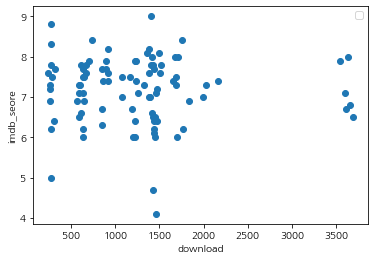

In [62]:
import matplotlib.pylab as plt

plt.scatter( down_count_['down_count'], down_count_['imdb_score'])

plt.legend(loc = "best")
plt.xlabel('download')
plt.ylabel('imdb_seore')
plt.show()

## 막대그래프 + 추세선 추가 ★

In [152]:
### - 요일과 다운로드 횟수의 관계

df_down = pd.read_csv('Data_OTT//movie_down.csv', encoding = 'euc-kr')
df_down.head()
df = df_down[['down_weekday','item_id']]
df = pd.DataFrame(df[['down_weekday']].value_counts()).reindex()

df_ch = df.reindex([('Mon',),('Tue',),('Wed',),('Thu',),('Fri',),('Sat',),('Sun',)])

In [154]:
li = []
for i in df_ch[0]:
    li.append(i)
li

[11037, 5597, 12169, 17984, 27159, 22520, 19998]

In [155]:
li_x = []
for i in df_ch.index:
    li_x.append(list(i)[0])
li_x

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

Text(0, 0.5, '요일별 누적 다운로드 횟수')

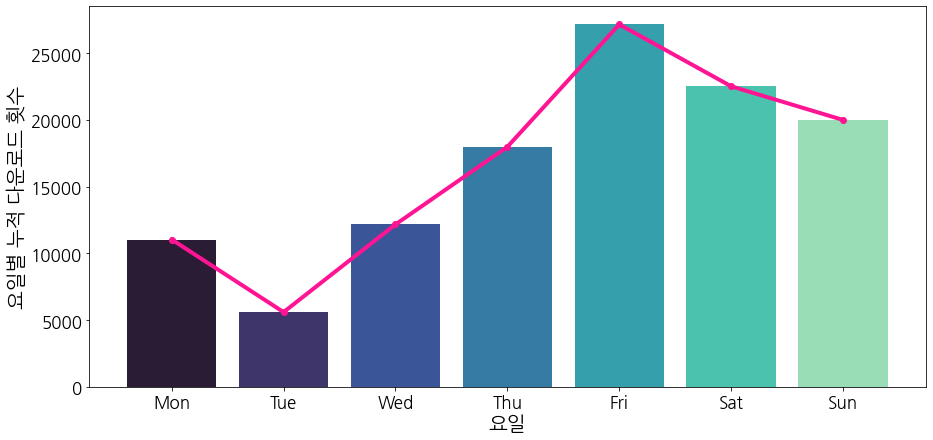

In [218]:
colors = sns.color_palette('mako', len(li_x))
plt.figure(figsize = (15,7))
plt.plot(li_x, li, color = 'deeppink', marker = 'o', linewidth=4.0)
plt.bar(li_x, li, color=colors)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel("요일", fontsize = 20)
plt.ylabel("요일별 누적 다운로드 횟수", fontsize = 20)

<AxesSubplot:xlabel='down_weekday'>

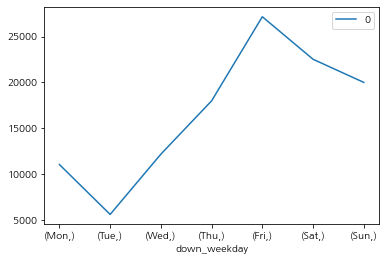

In [187]:
week_day.plot()

### - 고객의 장르선호도 / 전체 영화 장르 수

In [64]:
df_di = pd.read_csv('Data_OTT_update/download_inventory_final.csv', encoding = 'utf-8')
df_di.shape

(116464, 32)

In [65]:
df_down = pd.read_csv('Data_OTT//download_month.csv', encoding = 'euc-kr')
df_down.shape

(116464, 8)

In [66]:
df1 = df_down[['customer_id']]
df1

,customer_id
0,C5001
1,C5001
2,C5001
3,C5001
4,C5001
...,...
116459,C8277
116460,C8277
116461,C8277
116462,C8277


In [67]:
users_gen = Counter(df_di['Genre_1']) + Counter(df_di['Genre_2']) + Counter(df_di['Genre_3'])
del users_gen['ETC']
users_gen

Counter({'Action': 61161,
         'Adventure': 83862,
         'Animation': 27133,
         'Drama': 22584,
         'Comedy': 42150,
         'Biography': 9550,
         'Horror': 2094,
         'Family': 15667,
         'Sci-Fi': 28370,
         'Fantasy': 15373,
         'Crime': 4247,
         'Music': 1479,
         'Romance': 3239,
         'Thriller': 9212,
         'Mystery': 1135,
         'Sport': 1380,
         'History': 6288})

In [68]:
users_gen = sorted(users_gen.items(), key=lambda x: x[1], reverse=True)

In [69]:
users_gen = dict(users_gen)
users_gen

{'Adventure': 83862,
 'Action': 61161,
 'Comedy': 42150,
 'Sci-Fi': 28370,
 'Animation': 27133,
 'Drama': 22584,
 'Family': 15667,
 'Fantasy': 15373,
 'Biography': 9550,
 'Thriller': 9212,
 'History': 6288,
 'Crime': 4247,
 'Romance': 3239,
 'Horror': 2094,
 'Music': 1479,
 'Sport': 1380,
 'Mystery': 1135}

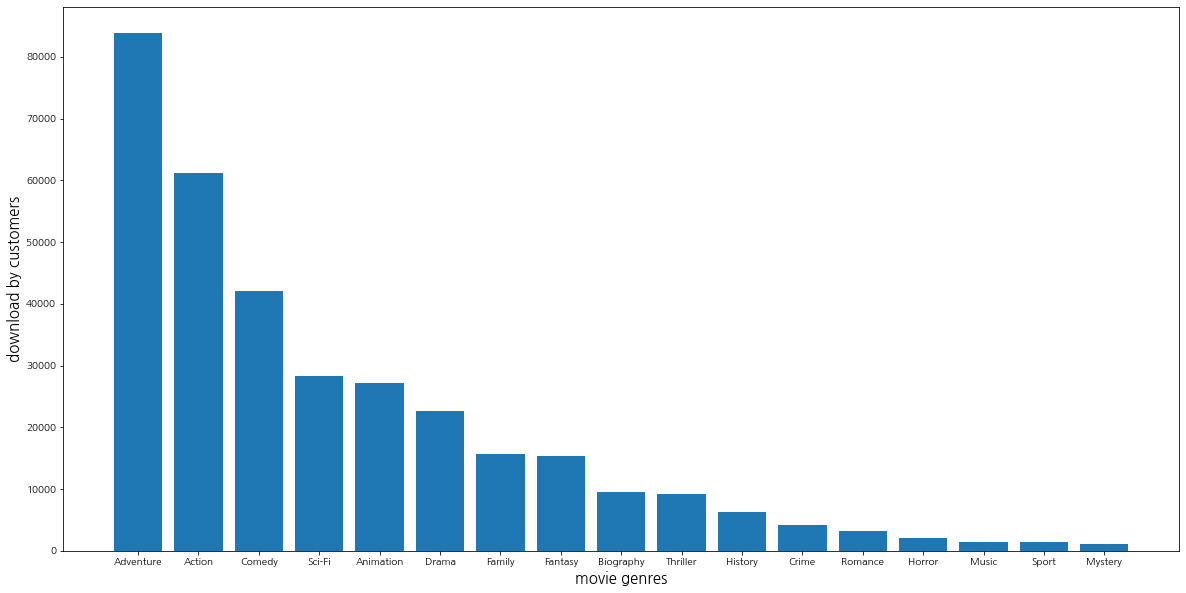

In [70]:
gen_x = []
gen_y = []

for key, value in users_gen.items():
    gen_x.append(key)
    gen_y.append(value)

plt.figure(figsize = (20,10))
plt.bar(gen_x, gen_y)
plt.xlabel('movie genres', fontsize = (15))
plt.ylabel('download by customers', fontsize = 15)
plt.show()

In [71]:
df_in = pd.read_csv('Data_OTT/movie_inventory.csv', encoding = 'euc-kr')
df_in

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,director,Genre_1,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,05-19-2005,140,PG-13,PG-13,7.5,...,George Lucas,Action,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,2005,11-18-2005,157,PG-13,PG-13,7.7,...,Mike Newell,Adventure,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",2005,12-09-2005,143,PG,PG,6.9,...,Andrew Adamson,Adventure,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,07-07-2006,151,PG-13,PG-13,7.3,...,Gore Verbinski,Action,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1
4,I-1005,2015,tt0413300,Spider-Man 3,2007,05-04-2007,139,PG-13,PG-13,6.2,...,Sam Raimi,Action,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,I-1102,2019,tt5095030,Ant-Man and the Wasp,2018,07-06-2018,118,PG-13,PG-13,7.1,...,Peyton Reed,Action,Adventure,Comedy,Paul Rudd,Evangeline Lilly,Michael Pe a,2295,10,1
102,I-1103,2019,tt4912910,Mission: Impossible - Fallout,2018,07-27-2018,147,PG-13,PG-13,7.8,...,Christopher McQua,Action,Adventure,Thriller,Tom Cruise,Henry Cavill,Ving Rhames,2700,10,10
103,I-1104,2019,tt1727824,Bohemian Rhapsody,2018,11-02-2018,134,PG-13,PG-13,8.0,...,Bryan Singer,Biography,Drama,Music,Rami Malek,Lucy Boynton,Gwilym Lee,2600,6,10
104,I-1105,2019,tt5848272,Bohemian Rhapsody,2018,11-21-2018,112,PG,PG,7.1,...,Phil Johnston,Animation,Adventure,Comedy,John C. Reilly,Sarah Silverman,Gal Gadot,2295,10,1


In [72]:
theater_gen = Counter(df_in['Genre_1']) + Counter(df_in['Genre_2']) + Counter(df_in['Genre_3'])
theater_gen

Counter({'Action': 61,
         'Adventure': 83,
         'Animation': 23,
         'Comedy': 35,
         'Biography': 6,
         'Drama': 16,
         'Horror': 3,
         'Family': 11,
         'Crime': 3,
         nan: 13,
         'Sci-Fi': 30,
         'Fantasy': 16,
         'Romance': 2,
         'Music': 2,
         'Thriller': 8,
         'Mystery': 2,
         'Sport': 1,
         'History': 3})

In [73]:
new_dic = {}
for key, value in theater_gen.items():
    if theater_gen[key] >= 8:
        new_dic[key] = value

new_dic

{'Action': 61,
 'Adventure': 83,
 'Animation': 23,
 'Comedy': 35,
 'Drama': 16,
 'Family': 11,
 nan: 13,
 'Sci-Fi': 30,
 'Fantasy': 16,
 'Thriller': 8}

In [74]:
genre_dict = {}

for title, num in new_dic.items():
    if title not in users_gen.keys():
        pass
    else:
        d = users_gen[title] / new_dic[title]
        genre_dict[title] = d
    
genre_dict

{'Action': 1002.639344262295,
 'Adventure': 1010.3855421686746,
 'Animation': 1179.695652173913,
 'Comedy': 1204.2857142857142,
 'Drama': 1411.5,
 'Family': 1424.2727272727273,
 'Sci-Fi': 945.6666666666666,
 'Fantasy': 960.8125,
 'Thriller': 1151.5}

In [75]:
genre_dict = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)
genre_dict = dict(genre_dict)
genre_dict

{'Family': 1424.2727272727273,
 'Drama': 1411.5,
 'Comedy': 1204.2857142857142,
 'Animation': 1179.695652173913,
 'Thriller': 1151.5,
 'Adventure': 1010.3855421686746,
 'Action': 1002.639344262295,
 'Fantasy': 960.8125,
 'Sci-Fi': 945.6666666666666}

# 고객이 다운로드한 총 선호 장르수 / 회사의 전체 장르 비율 ★
## 회사보유 영화 장르 대비 고객 선호 장르 (3번)

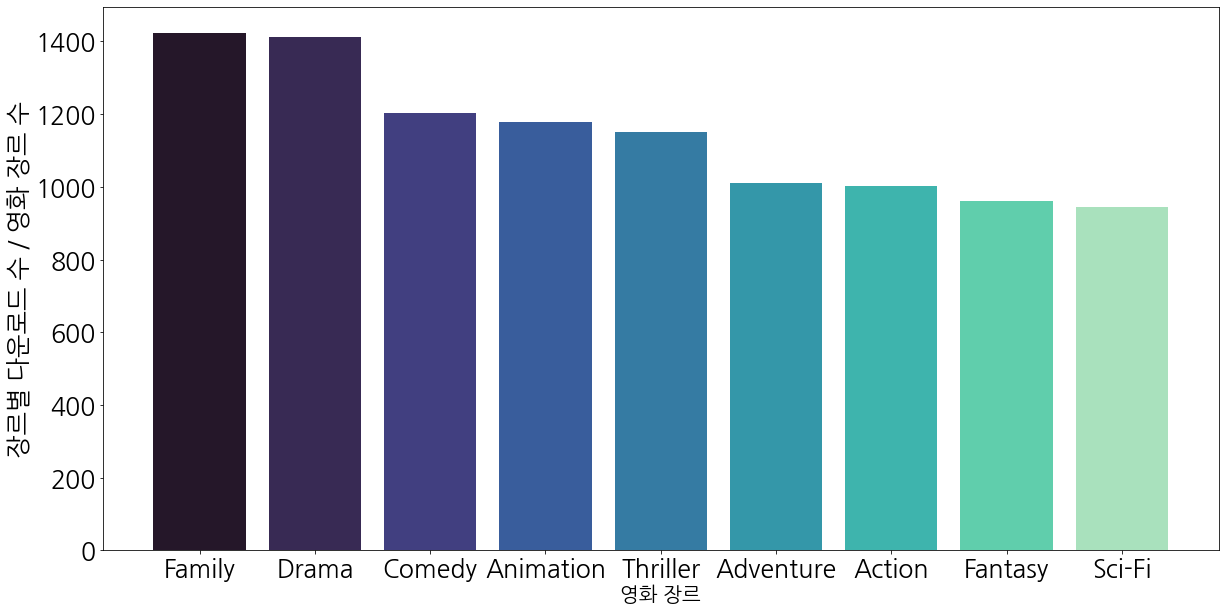

In [221]:
gen_x = []
gen_y = []


for key, value in genre_dict.items():
    gen_x.append(key)
    gen_y.append(value)
    
colors = sns.color_palette('mako', len(gen_x))
plt.figure(figsize = (20,10))
plt.bar(gen_x, gen_y, color=colors)
plt.xlabel('영화 장르', fontsize = (20))
plt.ylabel('장르별 다운로드 수 / 영화 장르 수', fontsize = 25)

plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

plt.show()

### 영화사 전체 다운로드 수

In [168]:
theater_gen = Counter(df_in['Genre_1']) + Counter(df_in['Genre_2']) + Counter(df_in['Genre_3'])
theater_gen

Counter({'Action': 61,
         'Adventure': 83,
         'Animation': 23,
         'Comedy': 35,
         'Biography': 6,
         'Drama': 16,
         'Horror': 3,
         'Family': 11,
         'Crime': 3,
         nan: 13,
         'Sci-Fi': 30,
         'Fantasy': 16,
         'Romance': 2,
         'Music': 2,
         'Thriller': 8,
         'Mystery': 2,
         'Sport': 1,
         'History': 3})

In [177]:
new_dic = {}
for key, value in theater_gen.items():
    if theater_gen[key] >= 8:
        new_dic[key] = value
new_dic

{'Adventure': 83,
 'Action': 61,
 'Comedy': 35,
 'Sci-Fi': 30,
 'Animation': 23,
 'Drama': 16,
 'Fantasy': 16,
 'Family': 11,
 'Thriller': 8}

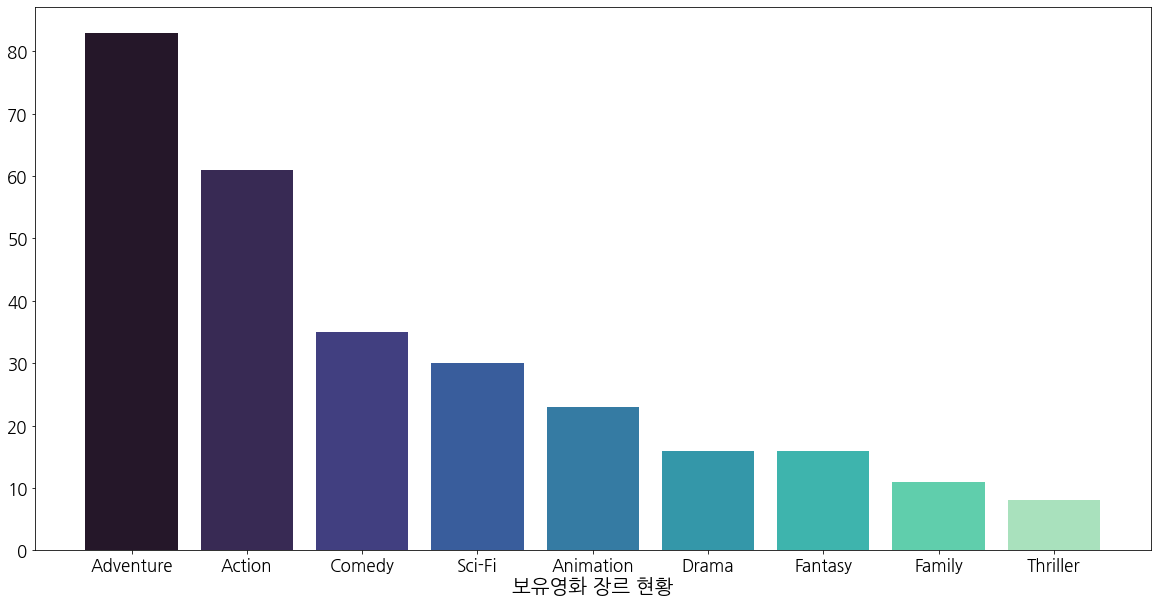

In [178]:
theater_gen = sorted(new_dic.items(), key=lambda x: x[1], reverse=True)
theater_gen = dict(theater_gen)
theater_gen

gen_x = []
gen_y = []

for key, value in new_dic.items():
    if new_dic[key] == 13:
        del new_dic[key]
    else:
        gen_x.append(key)
        gen_y.append(value)
plt.figure(figsize = (20,10))
colors = sns.color_palette('mako', len(gen_x))
plt.bar(gen_x, gen_y, color=colors)
plt.xlabel('보유영화 장르 현황', fontsize = (20))
plt.ylabel('', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

### 2번

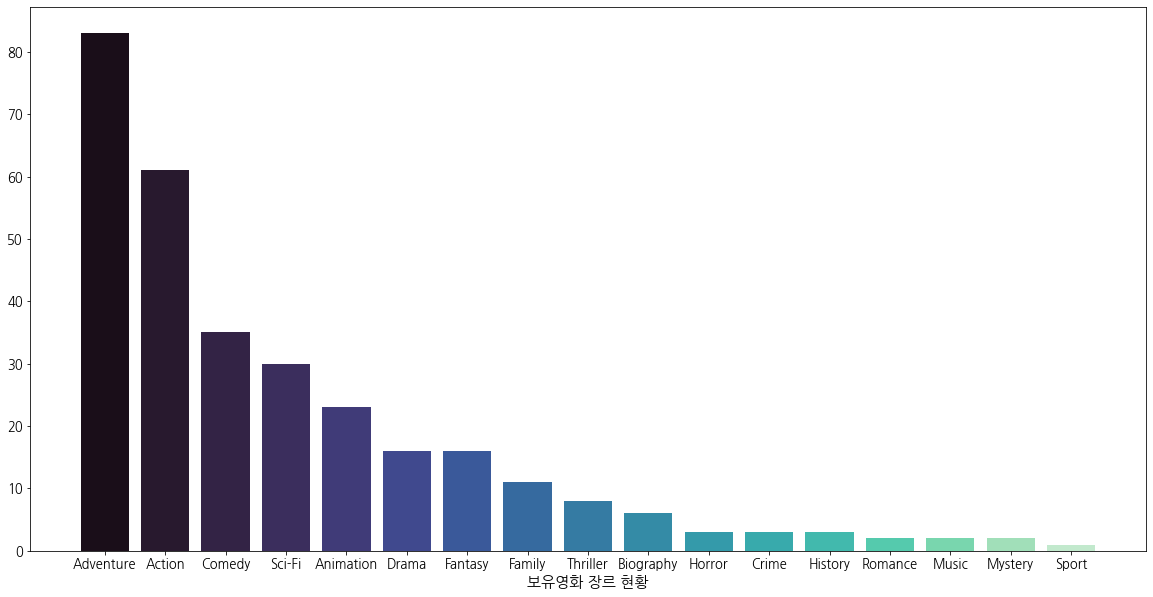

In [173]:
theater_gen = sorted(theater_gen.items(), key=lambda x: x[1], reverse=True)
theater_gen = dict(theater_gen)
theater_gen

gen_x = []
gen_y = []
for key, value in theater_gen.items():
    if theater_gen[key] == 13:
        del theater_gen[key]
    else:
        gen_x.append(key)
        gen_y.append(value)
        
plt.figure(figsize = (20,10))
colors = sns.color_palette('mako', len(gen_x))
plt.bar(gen_x, gen_y, color=colors)
plt.xlabel('보유영화 장르 현황', fontsize = (15))
plt.ylabel('', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

### - 연령대와 다운로드 횟수와의 관계

In [223]:
df_cus = pd.read_csv('Data_OTT_update//movie_custom_final.csv', encoding = 'utf-8')
df_cus

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...
3272,C8273,F,43,40대,M,N,마포구,2018,8,37000.0,Bronze
3273,C8274,F,24,20대,M,N,송파구,2018,10,48700.0,Bronze
3274,C8275,F,55,50대,S,N,강남구,2018,9,44500.0,Bronze
3275,C8276,F,36,30대,S,Y,서대문구,2018,17,77500.0,Bronze


In [224]:
df_age = df_cus.groupby(['age_group'])[['download_count']].sum()
df_age

,download_count
age_group,
10대,1231
20대,31118
30대,31448
40대,30303
50대,19685
60대,2679


In [225]:
df_count_ag = df_cus.groupby(["age_group"]).size()
df_count_ag

age_group
10대     48
20대    965
30대    880
40대    749
50대    547
60대     88
dtype: int64

In [226]:
li_ag = []
cnt = 0
for i in df_age.values:
    li_ag.append(( i / df_count_ag[cnt])[0])
    cnt += 1
li_ag

[25.645833333333332,
 32.24663212435233,
 35.736363636363635,
 40.45794392523364,
 35.9872029250457,
 30.443181818181817]

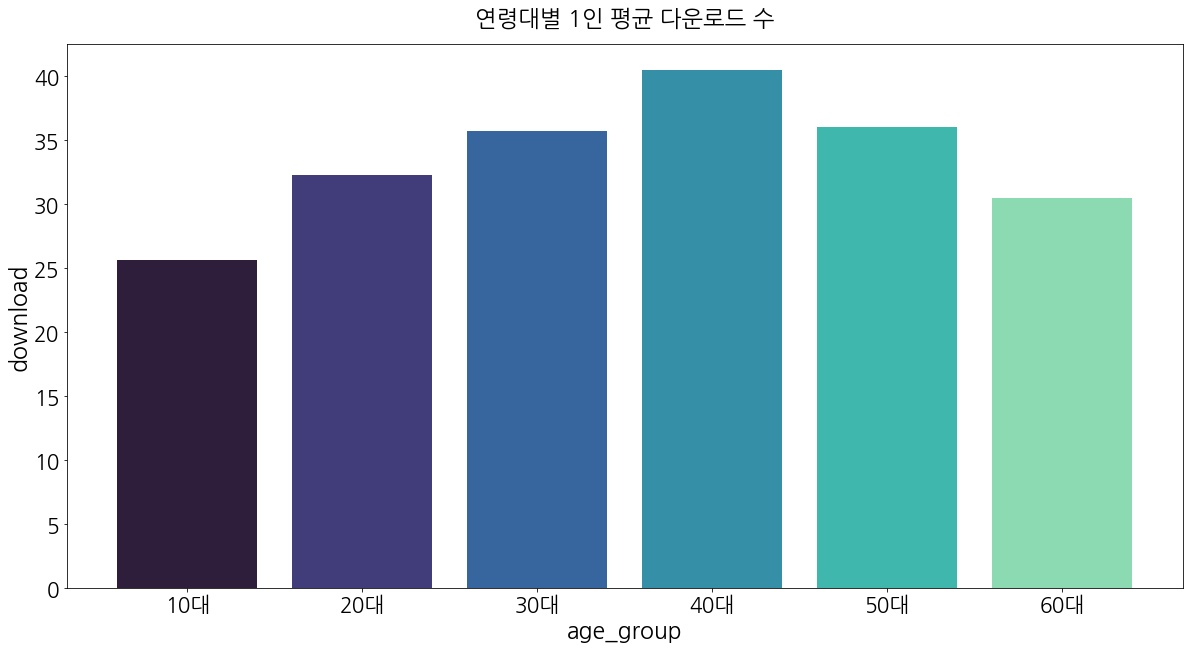

In [235]:
colors = sns.color_palette('mako', 6)
plt.figure(figsize = (20,10))
plt.bar(df_age.index, li_ag, color = colors)

plt.title('연령대별 1인 평균 다운로드 수', fontsize = 23, pad=20)

plt.xlabel('age_group', fontsize = 23)
plt.ylabel('download', fontsize = 23)

plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)

plt.show()

### - 결혼 여부와 다운로드 횟수와의 관계

In [236]:
df_married = df_cus.groupby(['married'])[['download_count']].sum()
df_married

,download_count
married,
M,83565
S,32899


In [237]:
df_count_m = df_cus.groupby(["married"]).size()
df_count_m

married
M    2089
S    1188
dtype: int64

In [238]:
li_m = []
cnt = 0
for i in df_married.values:
    li_m.append(( i / df_count_m[cnt])[0])
    cnt += 1
li_m

[40.00239348970799, 27.69276094276094]

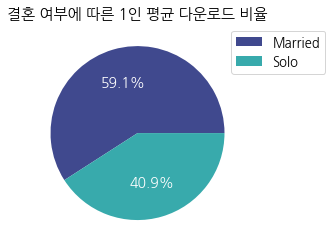

In [308]:
colors = sns.color_palette("mako", 2)

plt.pie(li_m, labels=['Married','Solo'], autopct='%.1f%%', textprops={"fontsize":14, 'color':"w"},  colors = colors)

plt.title('결혼 여부에 따른 1인 평균 다운로드 비율', fontsize = 15)
plt.legend(bbox_to_anchor=(0.9, 1), fontsize=13)
plt.show()

### - 성별과 다운로드의 관계

In [285]:
df_gender = df_cus.groupby(['gender'])[['download_count']].sum()
df_gender

,download_count
gender,
F,61919
M,54545


In [286]:
df_count_g = df_cus.groupby(["gender"]).size()
df_count_g

gender
F    1655
M    1622
dtype: int64

In [287]:
li_g = []
cnt = 0
for i in df_gender.values:
    li_g.append(( i / df_count_g[cnt])[0])
    cnt += 1
li_g

[37.41329305135952, 33.628236744759555]

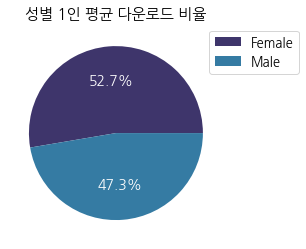

In [321]:
colors = sns.color_palette("mako", 3)

plt.pie(li_g, labels=['Female','Male'], autopct='%.1f%%', textprops={"fontsize":14, 'color':"w"},  colors = colors)
plt.title('성별 1인 평균 다운로드 비율', fontsize = 15)
plt.legend(bbox_to_anchor=(0.9, 1), fontsize=13)
plt.show()

### - 12세 이하 아이 유무와 다운로드 수의 관계

In [296]:
df_kid = df_cus.groupby(['kids_under12'])[['download_count']].sum()
df_kid

,download_count
kids_under12,
N,61793
Y,54671


In [297]:
df_count_k = df_cus.groupby(["kids_under12"]).size()
df_count_k

kids_under12
N    2180
Y    1097
dtype: int64

In [298]:
li_k = []
cnt = 0
for i in df_kid.values:
    li_k.append(( i / df_count_k[cnt])[0])
    cnt += 1
li_k

[28.345412844036698, 49.83682771194166]

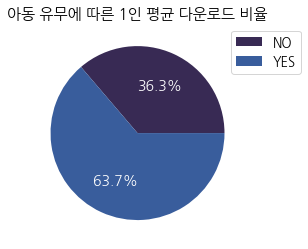

In [323]:
colors = sns.color_palette("mako", 4)

plt.pie(li_k, labels=['NO','YES'], autopct='%.1f%%', textprops={"fontsize":14, 'color':"w"},  colors = colors)
plt.title('아동 유무에 따른 1인 평균 다운로드 비율', fontsize = 15)
plt.legend(bbox_to_anchor=(0.9, 1), fontsize=13)
plt.show()

### - 나이와 다운로드 수의 관계

In [47]:
df_a1 = df_cus.groupby(['age'])[['customer_id']].count()

df_a2 = df_cus.groupby(['age'])[['download_count']].sum()

li_age = []
for i in range(len(df_a1)):
    li_age.append(df_a2.iloc[i][0] / df_a1.iloc[i][0])


No handles with labels found to put in legend.


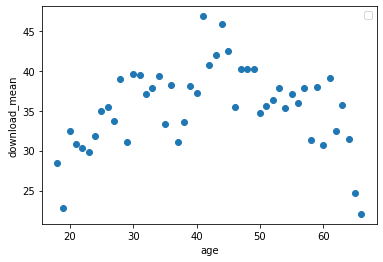

In [48]:
plt.scatter(df_a1.index, li_age)

plt.legend(loc = "best")
plt.xlabel('age')
plt.ylabel('download_mean')
plt.show()

### - 거주지와 다운로드 수의 관계

In [49]:
df_cus

,Unnamed: 0,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,download_count,total_price,class
0,0,C5001,F,51,50대,M,N,용산구,2015,55,262000.0,Platinum
1,1,C5002,M,22,20대,S,N,강남구,2015,23,102200.0,Silver
2,2,C5003,F,33,30대,M,Y,서대문구,2015,55,270800.0,Platinum
3,3,C5004,F,24,20대,M,N,서대문구,2015,41,200400.0,Gold
4,4,C5005,F,35,30대,M,N,마포구,2015,34,165900.0,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
3272,3272,C8273,F,43,40대,M,N,마포구,2018,8,37000.0,Bronze
3273,3273,C8274,F,24,20대,M,N,송파구,2018,10,48700.0,Bronze
3274,3274,C8275,F,55,50대,S,N,강남구,2018,9,44500.0,Bronze
3275,3275,C8276,F,36,30대,S,Y,서대문구,2018,17,77500.0,Bronze


In [50]:
df_area1 = df_cus.groupby(['area'])[['download_count']].sum()
df_area2 = df_cus.groupby(['area'])[['customer_id']].count()

li_area = []
for i in range(len(df_area1)):
    li_area.append(df_a2.iloc[i][0] / df_a1.iloc[i][0])

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

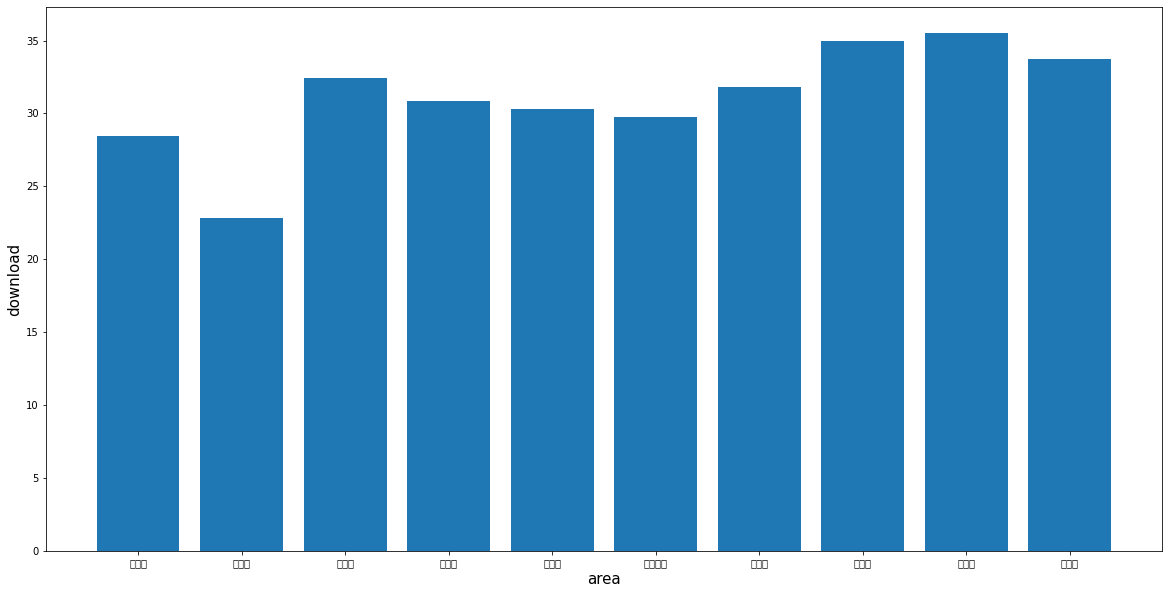

In [51]:
plt.figure(figsize = (20,10))
plt.bar(df_area2.index, li_area)
plt.xlabel('area', fontsize = (15))
plt.ylabel('download', fontsize = 15)

plt.show()

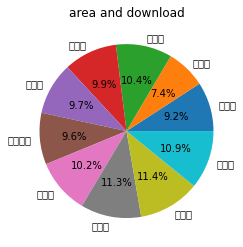

In [52]:
plt.pie(li_area, labels=df_area2.index, autopct='%.1f%%')
plt.title('area and download')
plt.show()

### - 연령대와 12세 아이 유무의 관계

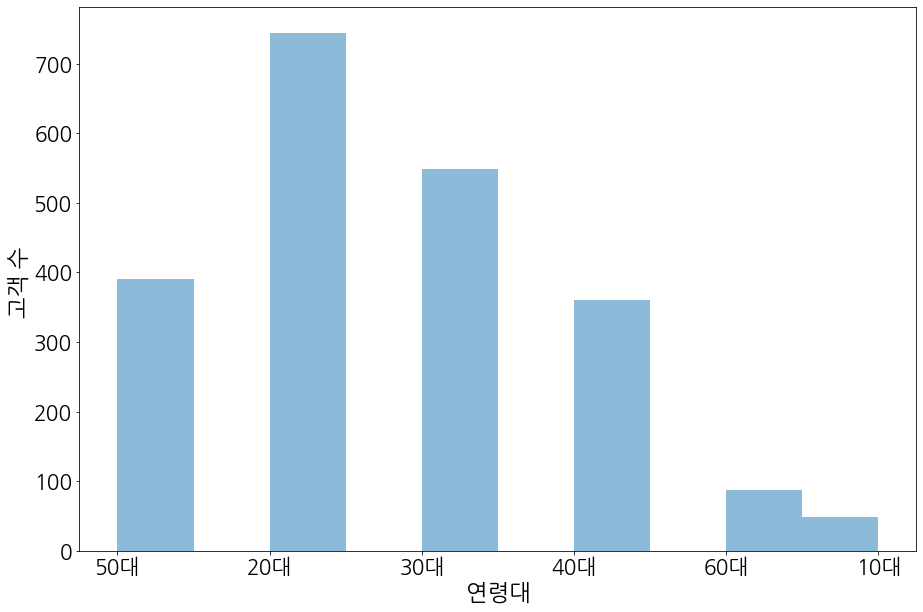

In [345]:
plt.figure(figsize = (15,10))

# plt.bar(df_cus["age_group"] ,df_cus["kids_under12"])
# # plt.hist(df_cus["kids_under12"], stacked=True, alpha = 0.5)
plt.hist(df_cus[df_cus["kids_under12"] == 'N']['age_group'], label = "NO", alpha = 0.5)

plt.xlabel('연령대', fontsize = 23)
plt.ylabel('고객 수 ', fontsize = 23)

plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)

plt.show()

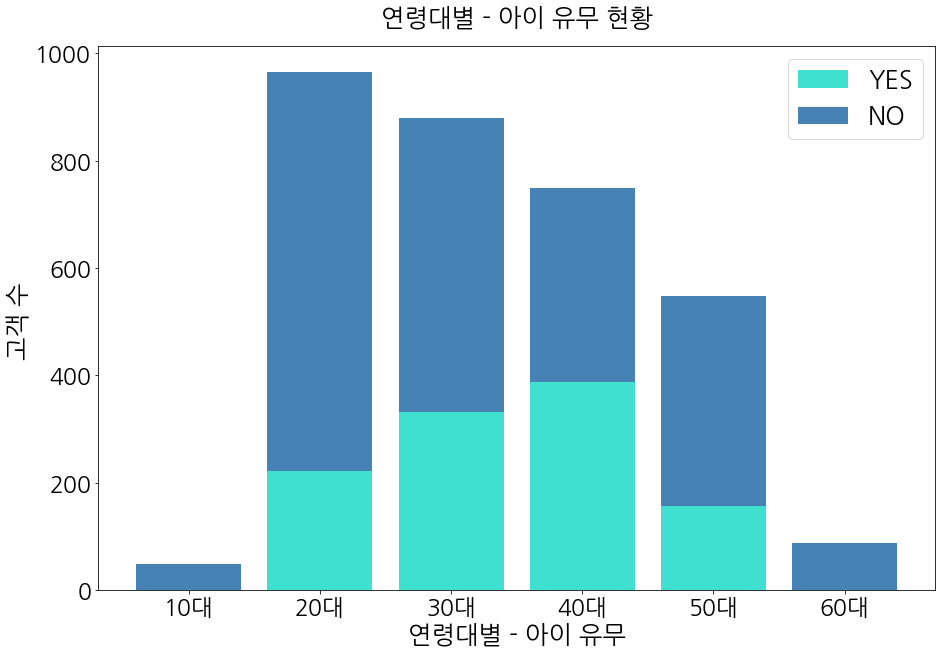

In [390]:
colors = sns.color_palette("mako", 4)
df_ak = pd.DataFrame({'10대':[0, 48], '20대':[221, 744], '30대':[331, 549], '40대':[388, 361], '50대':[157, 390], '60대':[0, 88]})
plt.figure(figsize = (15, 10))

plt.bar(df_ak.columns, df_ak.iloc[0], label = 'YES', color="turquoise")
plt.bar(df_ak.columns, df_ak.iloc[1], label = 'NO', bottom = df_ak.iloc[0], color="steelblue")

plt.title('연령대별 - 아이 유무 현황', fontsize = 25, pad=20)

plt.xlabel('연령대별 - 아이 유무', fontsize = 25)
plt.ylabel('고객 수 ', fontsize = 25)

plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)

plt.legend(fontsize=25)

## 매출 순수익 분포

In [32]:
custom = pd.read_csv("Data_OTT_update/movie_custom_final.csv")
custom.shape

(3277, 11)

In [33]:
download = pd.read_csv("Data_OTT_update/download_inventory_final.csv")
download.shape

(116464, 32)

In [34]:
inventory = pd.read_csv("Data_OTT_update/inventory_interest_final.csv")
inventory.shape

(106, 30)

In [35]:
meta = pd.read_csv("Data_OTT_update/movie_meta_final.csv")
meta.shape

(1668, 30)

In [6]:
download.shape

(116464, 32)

In [7]:
inventory.shape

(106, 30)

In [8]:
count = pd.DataFrame(download["title"].value_counts())

In [9]:
count.rename(columns={"title":"count"}, inplace = True)
count.head()

,count
The Hunger Games: Mockingjay - Part 2,3689
Spectre,3661
The Martian,3632
Hotel Transylvania 2,3608
The Peanuts Movie,3599


In [10]:
count = count.reset_index()

In [11]:
count.rename(columns={"index":"title"}, inplace = True)

In [12]:
inventory.shape

(106, 30)

In [13]:
inv_count = pd.merge(inventory, count, on = "title", how = "left")

In [14]:
inv_count.fillna(0,inplace=True)

In [15]:
inv_count.shape

(106, 31)

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

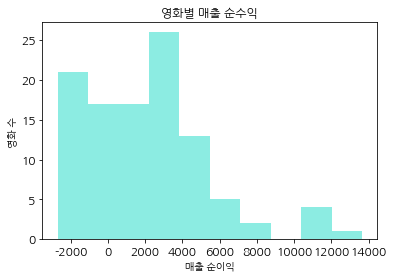

In [29]:
colors = sns.color_palette('mako', 1)
plt.hist(inv_count["interest"], color="turquoise", bins=10, alpha = 0.6)
plt.title("영화별 매출 순수익")
plt.xlabel("매출 순이익")
plt.ylabel("영화 수 ")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

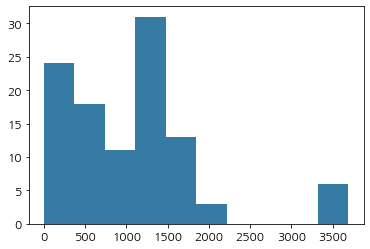

In [17]:
colors = sns.color_palette('mako', 1)
plt.hist(inv_count["count"], color=colors)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# 누적 고객 구매금액 분포

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

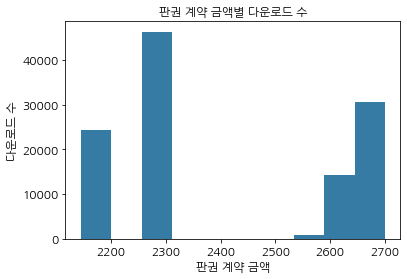

In [30]:
colors = sns.color_palette('mako', 1)
plt.hist(download["contract_price"], color=colors)
plt.title("판권 계약 금액별 다운로드 수", fontsize = 12)
plt.xlabel("판권 계약 금액", fontsize = 12)
plt.ylabel("다운로드 수", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

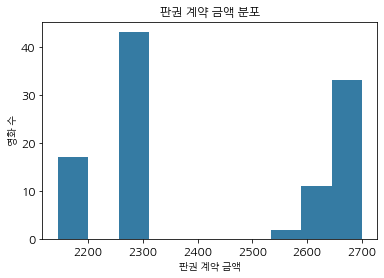

In [28]:
colors = sns.color_palette('mako', 1)
plt.hist(inventory["contract_price"], color=colors)
plt.title("판권 계약 금액 분포")
plt.xlabel("판권 계약 금액")
plt.ylabel("영화 수")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [23]:
colors = sns.color_palette('mako', 1)
plt.hist(inv_count["download_count"], color=colors)
plt.title("보유 영화당 매출 순수익")
plt.xlabel("매출 순이익")
plt.ylabel("영화 수 ")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

KeyError: 'download_count'

In [42]:
download.columns

Index(['customer_id', 'item_id', 'movie_id', 'down_year', 'down_month',
       'down_weekday', 'season', 'title', 'release_year', 'contract_year',
       'runtime', 'mpa_rating', 'imdb_score', 'votes', 'reviews_users',
       'reviews_critics', 'budget', 'income_usa', 'income_ww', 'country_1',
       'studio', 'director', 'Genre_1', 'Genre_2', 'Genre_3', 'actor_1',
       'actor_2', 'actor_3', 'contract_price', 'studio_score', 'price_class',
       'price'],
      dtype='object')

In [43]:
download.down_year

array([2015, 2016, 2017, 2018])

## 히트맵 분석

In [16]:
df_inv = pd.read_csv("./Data_OTT_update/inventory_theater_total.csv")
df_inv

,Unnamed: 0,item_id,movie_id,title,release_year,contract_year,runtime,mpa_rating,imdb_score,votes,...,actor_2,actor_3,contract_price,studio_score,price_class,price,total_price,total_dollar,interest,theater_total
0,0,I-1063,tt2452042,The Peanuts Movie,2015,2016,88,G,7.1,39900,...,Rebecca Bloom,Anastasia Bredikhina,2195,6,1,5000.0,17995000.0,15841.0,13646.0,3902
1,1,I-1061,tt3659388,The Martian,2015,2016,144,PG-13,8.0,701756,...,Jessica Chastain,Kristen Wiig,2600,6,10,4500.0,16344000.0,14387.0,11787.0,3854
2,2,I-1059,tt1398426,Straight Outta Compton,2015,2016,147,R,7.9,168582,...,Corey Hawkins,Jason Mitchell,2600,6,10,4500.0,15975000.0,14062.0,11462.0,3142
3,3,I-1062,tt2379713,Spectre,2015,2016,148,PG-13,6.8,359445,...,Christoph Waltz,L占쏙옙a Seydoux,2295,10,1,4000.0,14644000.0,12891.0,10596.0,3929
4,4,I-1060,tt2510894,Hotel Transylvania 2,2015,2016,89,PG,6.7,96526,...,Andy Samberg,Selena Gomez,2295,10,1,4000.0,14432000.0,12704.0,10409.0,3768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,I-1098,tt5463162,Deadpool 2,2018,2019,119,R,7.7,424573,...,Josh Brolin,Morena Baccarin,2600,6,10,4500.0,0.0,0.0,-2600.0,4349
102,102,I-1104,tt1727824,Bohemian Rhapsody,2018,2019,134,PG-13,8.0,392599,...,Lucy Boynton,Gwilym Lee,2600,6,10,4500.0,0.0,0.0,-2600.0,4000
103,103,I-1097,tt4154756,Avengers: Infinity War,2018,2019,149,PG-13,8.5,725138,...,Chris Hemsworth,Mark Ruffalo,2700,10,10,7200.0,0.0,0.0,-2700.0,4474
104,104,I-1100,tt3606756,Incredibles 2,2018,2019,118,PG,7.7,219133,...,Holly Hunter,Sarah Vowell,2700,10,10,7200.0,0.0,0.0,-2700.0,4410


In [17]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       106 non-null    int64  
 1   item_id          106 non-null    object 
 2   movie_id         106 non-null    object 
 3   title            106 non-null    object 
 4   release_year     106 non-null    int64  
 5   contract_year    106 non-null    int64  
 6   runtime          106 non-null    int64  
 7   mpa_rating       106 non-null    object 
 8   imdb_score       106 non-null    float64
 9   votes            106 non-null    int64  
 10  reviews_users    106 non-null    int64  
 11  reviews_critics  106 non-null    int64  
 12  budget           106 non-null    int64  
 13  income_usa       106 non-null    int64  
 14  income_ww        106 non-null    int64  
 15  country_1        106 non-null    object 
 16  studio           106 non-null    object 
 17  director        

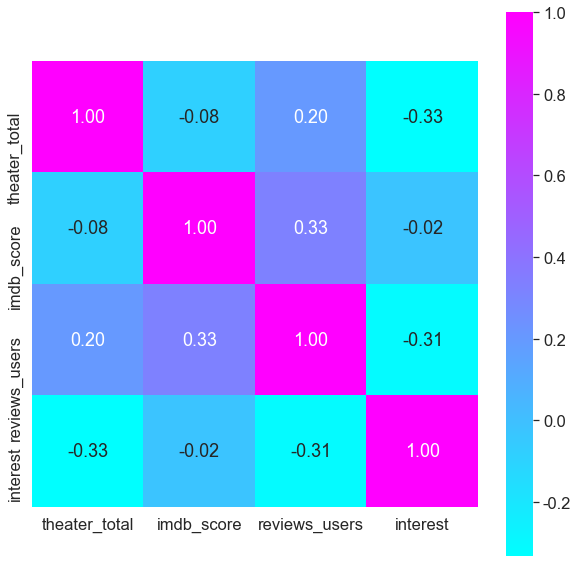

In [18]:
# total_theature, income, reviews_users, imdb_score 
# [["theater_total","imdb_score","reviews_users"]]

corr = df_inv[["theater_total","imdb_score","reviews_users","interest"]].corr().round(3)

sns.set(font_scale=1.5)
plt.figure(figsize=(10, 10))
df_heatmap = sns.heatmap(corr, cbar=True, annot=True,
                        annot_kws={'size':18}, fmt='.2f', square=True, cmap ='cool')

1) 목표변수와 설명변수 간 상관관계  
- interest는 다른 변수들과 상관관계가 없음  
  
2) 설명변수간 상관관계  
- 리뷰 수와 투표 수간 양의 상관관계 --> 리뷰가 많으면 평점 수도 많음
- 계약 금액, 가격 등급은 imdb 평점과 높은 양의 상관관계 --> 평점으로 등급과 계약 금액을 매기기 때문,, 
- 계약 가격과 가격 등급은 거의 동일한 것으로 보임 --> 하나 제외해도 되지 않을까? 
- total_price = total_dallar = interest --> 같은 분포이기 때문에 제외